## Authentication

In [49]:
!pip install praw

In [50]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="E78X-XUFhnol0vSgeRjySQ",
    client_secret="b9yBpBh8YbqSy9YhmFe5Ox6EqpKbqg",
    user_agent=user_agent
)

In [51]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get trending topic from your subreddit

In [52]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("ieee").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Is it okay to use UR/UY butt connectors to extend an Ethernet cable?
1c9b5qv
Born-Relation-5664
1713680922.0
2
1.0
https://www.reddit.com/r/IEEE/comments/1c9b5qv/is_it_okay_to_use_uruy_butt_connectors_to_extend/
0


In [53]:
headlines = set()
for submission in reddit.subreddit("ieee").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

206


In [54]:
#Create a dataframe from the scrapped data 
ieee_df = pd.DataFrame(headlines)
ieee_df.head()

,0
0,A step-by-step guide on how to become an IEEE ...
1,"Download Research Papers For Free From IEEE, S..."
2,http://spectrum.ieee.org/geek-life/history/a-m...
3,Are there any Student Branch goodies available?
4,IEEE Projects 2015 For Embedded Systems


In [55]:
ieee_df.columns

RangeIndex(start=0, stop=1, step=1)

In [56]:
ieee_df.columns = ['Titles']

In [57]:
ieee_df.head()

,Titles
0,A step-by-step guide on how to become an IEEE ...
1,"Download Research Papers For Free From IEEE, S..."
2,http://spectrum.ieee.org/geek-life/history/a-m...
3,Are there any Student Branch goodies available?
4,IEEE Projects 2015 For Embedded Systems


In [58]:
ieee_df.Titles.duplicated().sum() 

0

In [59]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
ieee_df["Titles"]= ieee_df["Titles"].apply(cleanTxt)

#Show the clean text
ieee_df.head()

,Titles
0,A step-by-step guide on how to become an IEEE ...
1,"Download Research Papers For Free From IEEE, S..."
2,
3,Are there any Student Branch goodies available?
4,IEEE Projects 2015 For Embedded Systems


In [60]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emotions
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
ieee_df["Titles"]= ieee_df["Titles"].apply(remove_emoji)
#Show the clean text
ieee_df.head()

,Titles
0,A step-by-step guide on how to become an IEEE ...
1,"Download Research Papers For Free From IEEE, S..."
2,
3,Are there any Student Branch goodies available?
4,IEEE Projects 2015 For Embedded Systems


In [61]:
!pip install textblob

In [62]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [63]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
ieee_df['Subjectivity'] = ieee_df['Titles'].apply(getSubjectivity)
ieee_df['Polarity'] = ieee_df['Titles'].apply(getPolarity)

#Now display data
ieee_df.head()

,Titles,Subjectivity,Polarity
0,A step-by-step guide on how to become an IEEE ...,0.0,0.0
1,"Download Research Papers For Free From IEEE, S...",0.8,0.4
2,,0.0,0.0
3,Are there any Student Branch goodies available?,0.4,0.4
4,IEEE Projects 2015 For Embedded Systems,0.0,0.0


In [64]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
ieee_df["Insight"] = ieee_df["Polarity"].apply(getInsight)

ieee_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,A step-by-step guide on how to become an IEEE ...,0.000000,0.000,Neutral
1,"Download Research Papers For Free From IEEE, S...",0.800000,0.400,Positive
2,,0.000000,0.000,Neutral
3,Are there any Student Branch goodies available?,0.400000,0.400,Positive
4,IEEE Projects 2015 For Embedded Systems,0.000000,0.000,Neutral
5,final year project center in coimbatore,0.550000,-0.050,Negative
6,IEEE Young Professionals Webinar- Leadership E...,0.600000,0.350,Positive
7,A Deep Dive Into IEEE’s Recent History,0.325000,0.000,Neutral
8,DC home power standards?,0.000000,0.000,Neutral
9,Why? Can't find your institution?,0.000000,0.000,Neutral


## Data visualization

In [65]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

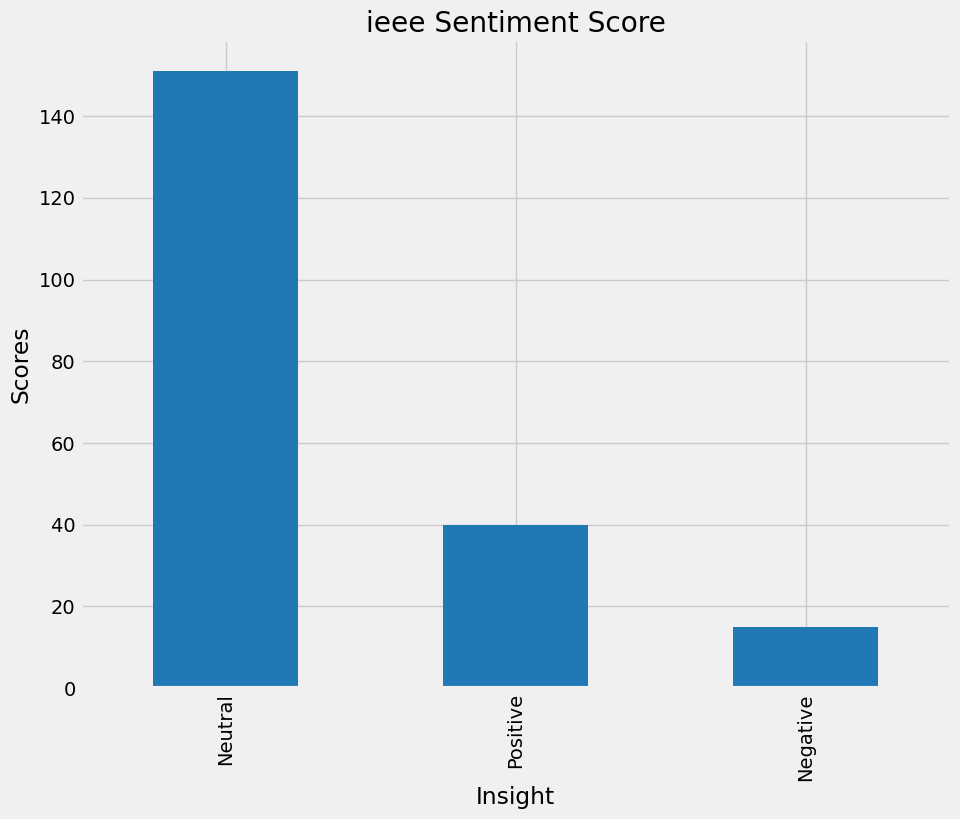

In [66]:
#Plot the values count of sentiment
plt.title("ieee Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
ieee_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

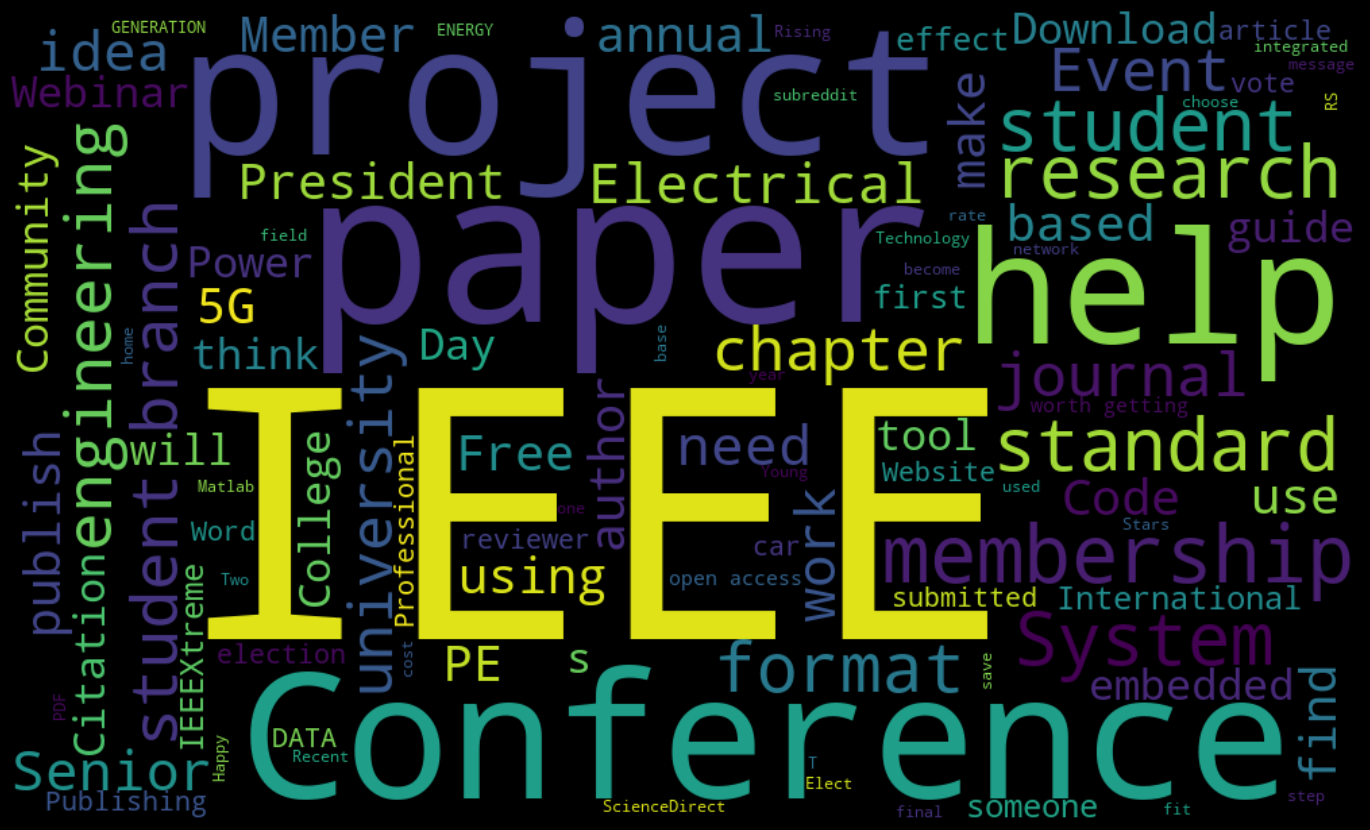

In [67]:
text = ' '.join( [twts for twts in ieee_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");